In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

Importing the dataset

In [4]:
# Path to the .csv file
path = 'MALL\dataset3.csv'
df = pd.read_csv(path)
# first 5 rows of the data
df.head()

,Index,1,2,3,4,5,6,7,8,9,...,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11
0,0,30695.634473,29411.872310,8713.326705,1468.295226,18686.581500,14375.566668,14325.421384,22337.304234,10724.878446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8278.544900,7801.304096,4289.126916,6241.688144,4769.789606,3571.221777,3613.777009,5862.992758,2664.807187,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30685.474898,29396.822206,8698.604908,1699.195434,18670.742771,14361.659494,14312.783925,22326.257715,10713.869062,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30238.359131,28879.614772,8715.650469,1743.125877,18222.186096,14033.779311,13953.044280,21840.745846,10439.087401,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,30706.942577,29418.198079,8693.110853,6226.447668,18676.633698,14360.421731,14311.429987,22333.701015,10708.492397,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
print('Number of datapoints :', df.shape[0])

Number of datapoints : 198


Preprocessing

In [82]:
target_columns = [ 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11']
X = df.drop(columns=target_columns)
y = df[target_columns]
print('shape of input :', X.shape)
print('shape of output :', y.shape)

shape of input : (198, 670)
shape of output : (198, 11)


In [83]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of train set :', X_train.shape)
print('shape of test set :', X_test.shape)

shape of train set : (158, 670)
shape of test set : (40, 670)


In [84]:
y_train_cat = y_train.map(lambda x: 1 if x > 0 else 0)
y_test_cat = y_test.map(lambda x: 1 if x > 0 else 0)
print('y_train_cat size', y_train_cat.shape)
print('y_test_cat size', y_test_cat.shape)

y_train_reg = y_train.max(axis=1).values.reshape(y_train.shape[0],1)
y_test_reg = y_test.max(axis=1).values.reshape(y_test.shape[0],1)
print('y_train_reg size', y_train_reg.shape)
print('y_test_reg size', y_test_reg.shape)

y_train_cat size (158, 11)
y_test_cat size (40, 11)
y_train_reg size (158, 1)
y_test_reg size (40, 1)


In [85]:
# Normalize the features and targets
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [86]:
# Define the input layer
input_layer = Input(shape=(X.shape[1],))

# Define the dense layers
dense_1 = Dense(300, activation='relu')(input_layer)
dense_2 = Dense(200, activation='relu')(dense_1)
dense_3 = Dense(100, activation='relu')(dense_2)

# Define the output layers
cat_output = Dense(len(target_columns), activation='softmax', name='cat')(dense_3)
reg_output = Dense(1, activation='linear', name='reg_lin')(dense_3)

# Create the model
model = Model(inputs=input_layer, outputs=[cat_output, reg_output])

# Print the model summary
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 670)]                0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 300)                  201300    ['input_7[0][0]']             
                                                                                                  
 dense_19 (Dense)            (None, 200)                  60200     ['dense_18[0][0]']            
                                                                                                  
 dense_20 (Dense)            (None, 100)                  20100     ['dense_19[0][0]']            
                                                                                            

In [102]:
epochs = 100
# Compile the model
model.compile(optimizer='adam',
              loss={'cat': 'categorical_crossentropy', 'reg_lin': 'mean_squared_error'},
              metrics={'cat': 'accuracy', 'reg_lin': 'mae'})
# Train the model
history = model.fit(X_train_scaled, {'cat': y_train_cat, 'reg_lin': y_train}, 
                    epochs=epochs, batch_size=32, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 78ms/step - loss: 1.5113 - cat_loss: 1.4777 - reg_lin_loss: 0.0336 - cat_accuracy: 0.4921 - reg_lin_mae: 0.1065 - val_loss: 55.1383 - val_cat_loss: 39.1369 - val_reg_lin_loss: 16.0014 - val_cat_accuracy: 0.2500 - val_reg_lin_mae: 0.8249
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.4555 - cat_loss: 1.4225 - reg_lin_loss: 0.0329 - cat_accuracy: 0.5317 - reg_lin_mae: 0.1177 - val_loss: 40.1008 - val_cat_loss: 40.0047 - val_reg_lin_loss: 0.0961 - val_cat_accuracy: 0.1875 - val_reg_lin_mae: 0.1534
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 1.3412 - cat_loss: 1.2972 - reg_lin_loss: 0.0440 - cat_accuracy: 0.5397 - reg_lin_mae: 0.1161 - val_loss: 47.7654 - val_cat_loss: 40.8317 - val_reg_lin_loss: 6.9337 - val_cat_accuracy: 0.2500 - val_reg_lin_mae: 0.5616
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 1.3316 - cat_loss: 1.2937 - reg_lin_loss: 0.0379 - cat_ac

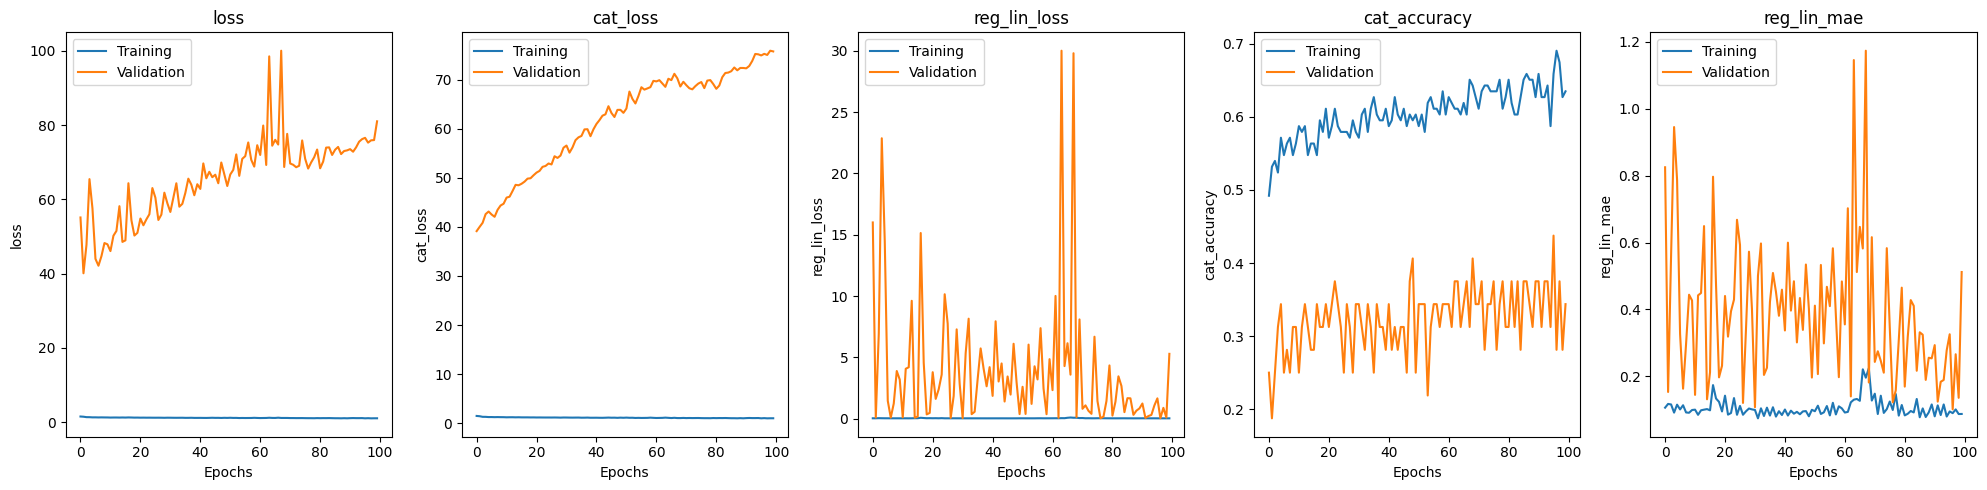

In [109]:

# List of metrics to plot
metrics = ['loss', 'cat_loss', 'reg_lin_loss', 'cat_accuracy', 'reg_lin_mae']
val_metrics = ['val_loss', 'val_cat_loss', 'val_reg_lin_loss', 'val_cat_accuracy', 'val_reg_lin_mae']

# Number of metrics
num_metrics = len(metrics)

# Create subplots
fig, axes = plt.subplots(1, num_metrics, figsize=(20, 5))

# Plot each metric
for i, metric in enumerate(metrics):
    axes[i].plot(history.history[metric], label='Training')
    axes[i].plot(history.history[val_metrics[i]], label='Validation')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel(metric)
    axes[i].legend()

plt.tight_layout()
plt.show()